## E-Commerce Customer Churn Predictive Model

Perusahaan e-commerce terkemuka menghadapi tantangan untuk mengidentifikasi pelanggan yang kemungkinan besar akan churn (berhenti berbelanja) dalam waktu dekat. Kehilangan pelanggan memiliki dampak signifikan terhadap pendapatan perusahaan, mengingat biaya yang lebih tinggi untuk menarik pelanggan baru dibandingkan mempertahankan pelanggan yang sudah ada. Oleh karena itu, perusahaan ingin mengembangkan model prediktif yang dapat mendeteksi pelanggan berisiko churn sehingga dapat diambil langkah-langkah preventif seperti menawarkan promosi atau program loyalitas yang tepat untuk mempertahankan mereka.

### Dataset
__[data_ecommerce_customer_churn.csv](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)__

### <b>Tujuan:</b>
- Memprediksi pelanggan yang akan churn dalam waktu dekat.
- Mengidentifikasi faktor-faktor utama yang menyebabkan churn.
- Mengembangkan strategi retensi berbasis data.

### <b>Data Understanding</b>
Data yang diberikan mencakup berbagai fitur yang dapat membantu dalam memprediksi churn pelanggan. Berikut adalah deskripsi masing-masing fitur:

1. <b>Tenure:</b> Lama waktu pelanggan bergabung dengan perusahaan.
2. <b>WarehouseToHome:</b> Jarak antara gudang dan rumah pelanggan.
3. <b>NumberOfDeviceRegistered:</b> Total perangkat yang terdaftar pada pelanggan tertentu.
4. <b>PreferedOrderCat:</b> Kategori pesanan yang paling sering dipesan pelanggan dalam bulan terakhir.
5. <b>SatisfactionScore:</b> Skor Kepuasan pelanggan terhadap layanan.
6. <b>MaritalStatus:</b> Status pernikahan pelanggan.
7. <b>NumberOfAddress:</b> Total alamat yang terdaftar pada pelanggan tertentu.
8. <b>Complaint:</b> Apakah ada keluhan yang diajukan dalam bulan terakhir.
9. <b>DaySinceLastOrder:</b> Jumlah hari sejak pesanan terakhir oleh pelanggan.
10. <b>CashbackAmount:</b> Rata-rata jumlah cashback yang diterima dalam bulan terakhir.
11. <b>Churn:</b> Indikator apakah pelanggan churn atau tidak.

### Data Understanding

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'data_ecommerce_customer_churn.csv'
data = pd.read_csv(file_path)

display(data.head())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB
None


Dari data.info() dapat kita ketahui bahwa :
 - Dataset memiliki total 3940 baris dan 11 kolom
 - Terdapat 3 tipe data  float(4),integer(5), dan object(2)

In [29]:
print(data.isnull().sum())

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64


Terdapat Missing Value pada 3 kolom 

In [30]:
display(data.describe())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


### Handling Missing Value

In [31]:
# Separate features into numerical and categorical based on data types
num_features = data.select_dtypes(include=['int64', 'float64']).columns
cat_features = data.select_dtypes(include=['object']).columns

# Print the features
print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')
Categorical features: Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')


In [32]:
num_missing = missing_values[num_features]
cat_missing = missing_values[cat_features]

print("Numerical features with missing values:\n", num_missing[num_missing > 0])
print("Categorical features with missing values:\n", cat_missing[cat_missing > 0])

Numerical features with missing values:
 Tenure               194
WarehouseToHome      169
DaySinceLastOrder    213
dtype: int64
Categorical features with missing values:
 Series([], dtype: int64)


In [33]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Fill missing numerical values with the median
for feature in num_features:
    data[feature].fillna(data[feature].median(), inplace=True)

print(data.isnull().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64


### EDA

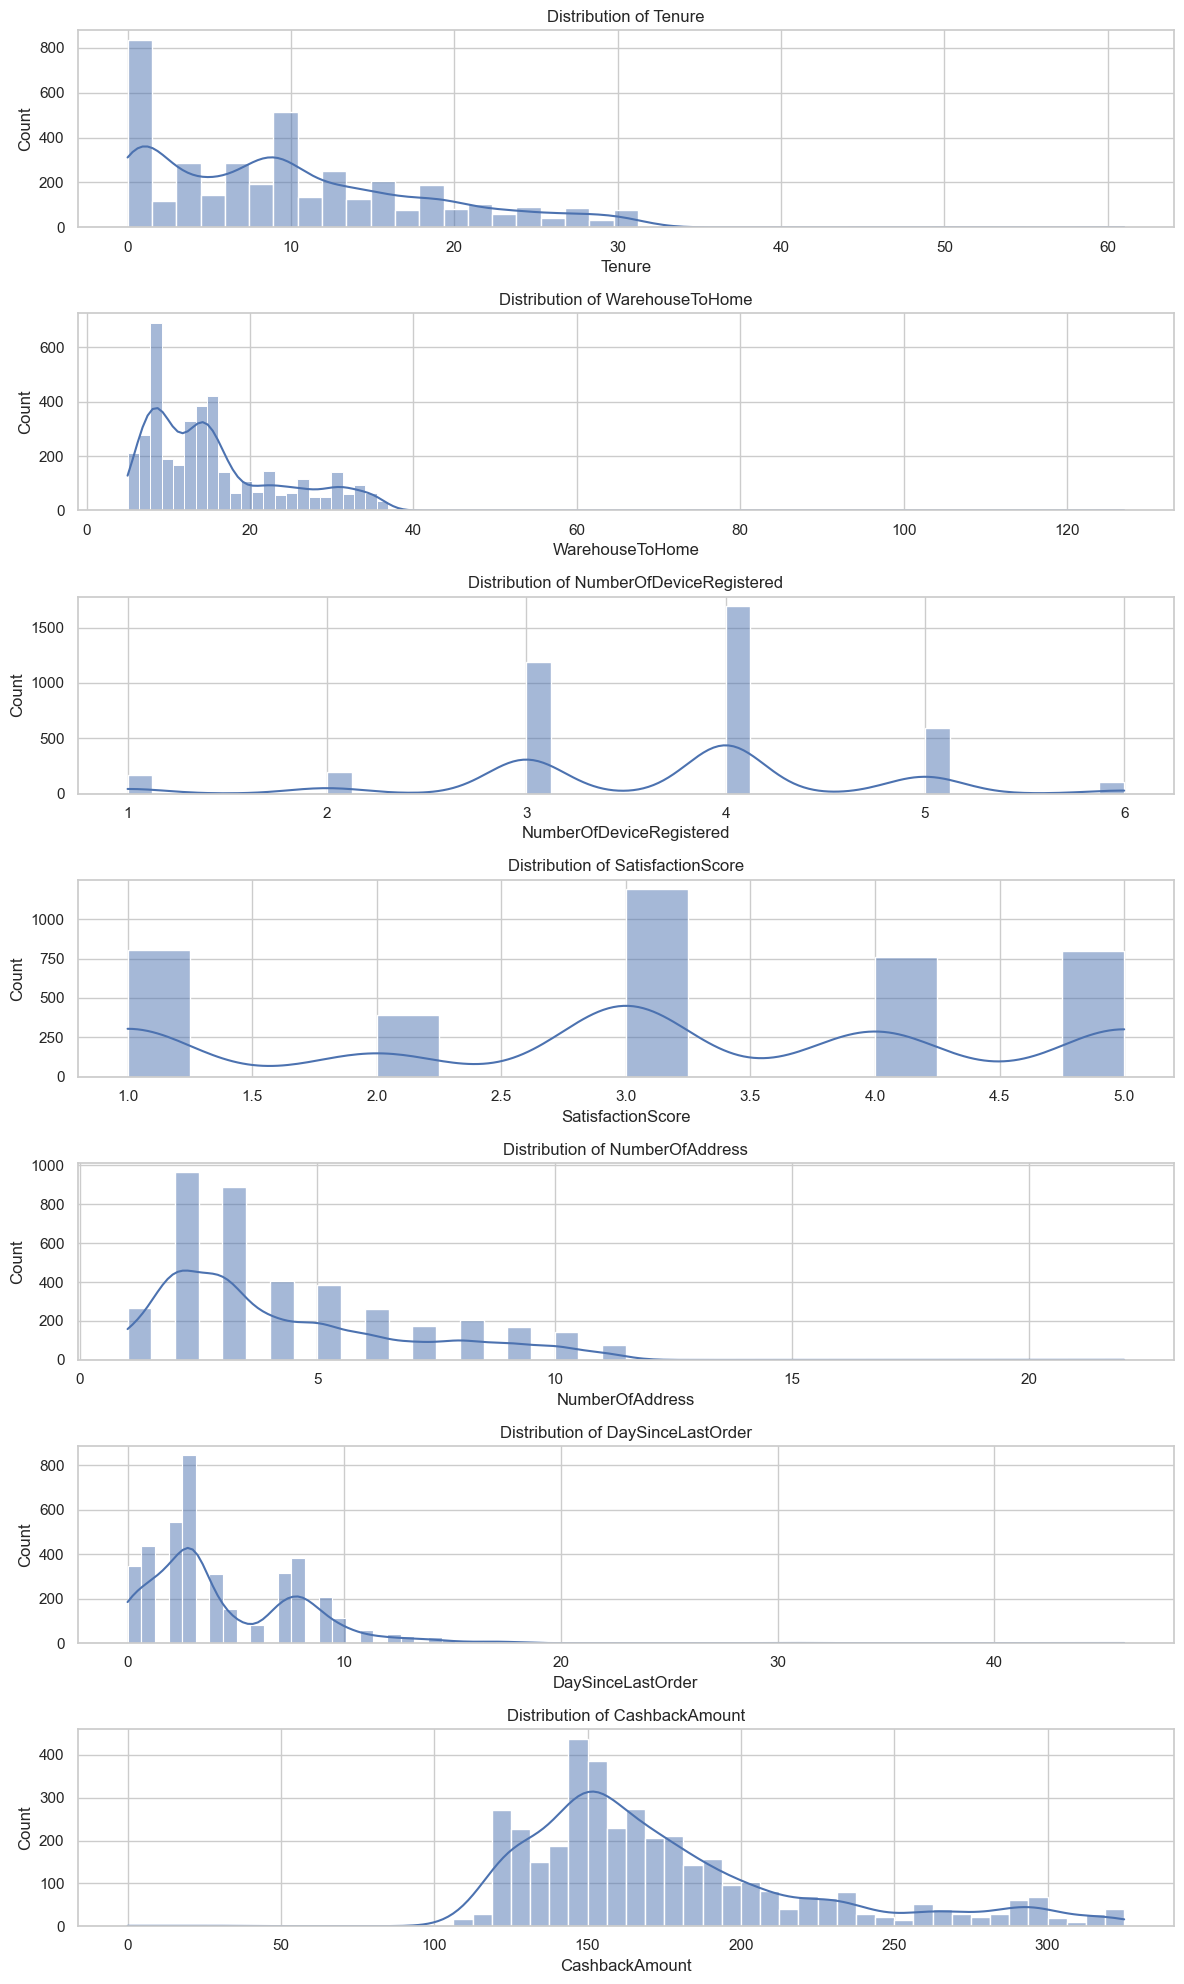

In [34]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

# Plotting Distribusi dari Fitur Numerikal 
num_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(len(num_features), 1, figsize=(12, 20))

for i, feature in enumerate(num_features):
    sns.histplot(data[feature].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

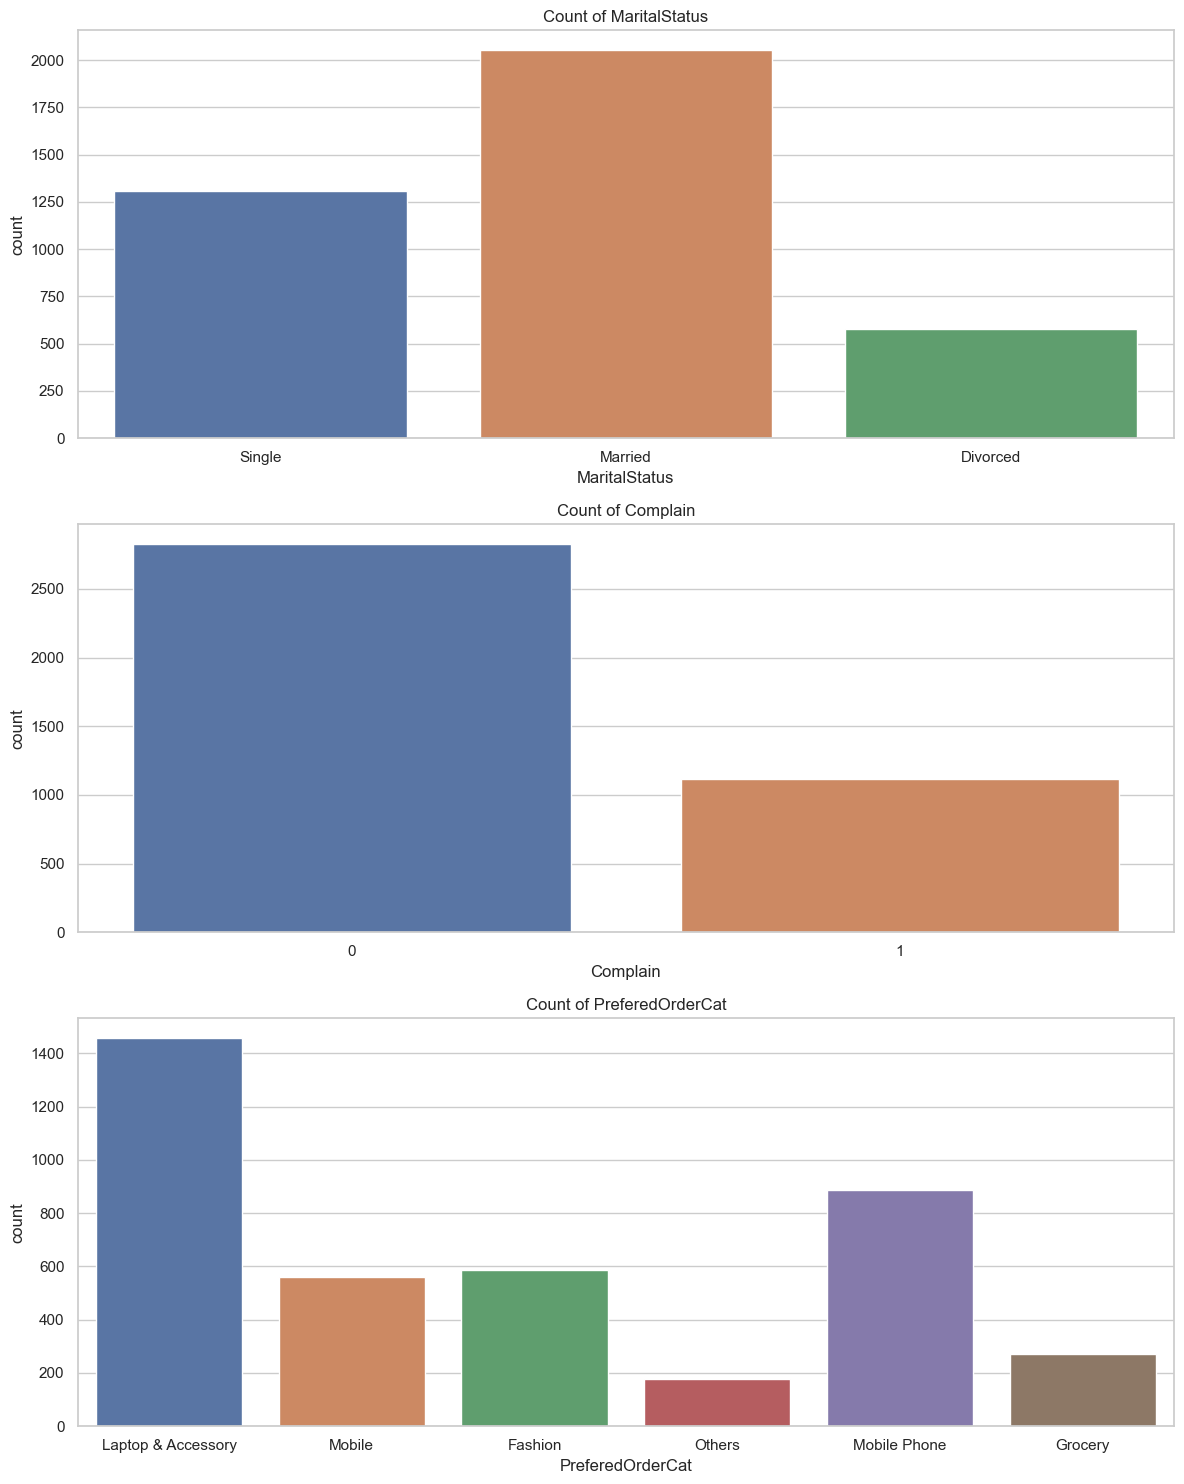

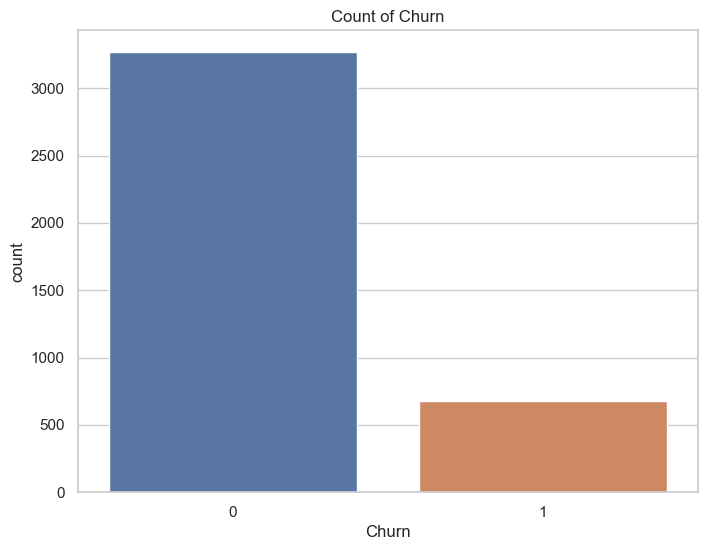

In [35]:
cat_features = ['MaritalStatus', 'Complain', 'PreferedOrderCat']

fig, axes = plt.subplots(len(cat_features), 1, figsize=(12, 15))

for i, feature in enumerate(cat_features):
    sns.countplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [36]:
churn_rate = data['Churn'].mean() * 100

print(f"Persentase pelanggan yang churn: {churn_rate:.2f}%")

Persentase pelanggan yang churn: 17.10%


Grafik 'Customer of Churn' Menunjukan bahwa Churn memiliki presentase 17.10% dan Retained 82.90%

### Data Pre-Processing

#### One-Hot Encoding
One-hot encoding adalah teknik yang sering digunakan untuk mengonversi data kategorikal menjadi format numerik yang dapat digunakan dalam algoritma machine learning. Berikut adalah alasan mengapa one-hot encoding cocok untuk data ini:
Alasan Menggunakan One-Hot Encoding:

- Representasi Numerik: Model machine learning memerlukan input numerik. One-hot encoding mengubah data kategorikal menjadi bentuk numerik tanpa memperkenalkan hubungan ordinal yang tidak ada.
- Menghindari Penomoran Kategorikal yang Salah: Jika kita menggunakan label encoding (memberikan angka untuk setiap kategori), model dapat salah menginterpretasikan nilai-nilai tersebut sebagai data ordinal. Misalnya, jika kita memberikan label 1, 2, dan 3 untuk tiga kategori, model mungkin menganggap 3 lebih besar dari 1 dan 2, padahal kategori tersebut tidak memiliki urutan.

kita memiliki kolom MaritalStatus dengan nilai Single, Married, dan Divorced. Dengan one-hot encoding, kita akan mendapatkan kolom baru seperti MaritalStatus_Single, MaritalStatus_Married, dan MaritalStatus_Divorced, dengan nilai biner 0 atau 1.


In [38]:
# Encoding Variabel Kategorikal menggunakan One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

# Normalizing the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_encoded.drop('Churn', axis=1))

# Convert normalized data back to DataFrame for easy handling
data_normalized_df = pd.DataFrame(data_normalized, columns=data_encoded.columns.drop('Churn'))

In [40]:
display(data_encoded.head())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount,Churn,MaritalStatus_Married,MaritalStatus_Single,Complain_1,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,15.0,29.0,4,3,2,7.0,143.32,0,False,True,False,False,True,False,False,False
1,7.0,25.0,4,1,2,7.0,129.29,0,True,False,False,False,False,True,False,False
2,27.0,13.0,3,1,5,7.0,168.54,0,True,False,False,False,True,False,False,False
3,20.0,25.0,4,3,7,3.0,230.27,0,False,False,False,False,False,False,False,False
4,30.0,15.0,4,4,8,8.0,322.17,0,False,True,False,False,False,False,False,True


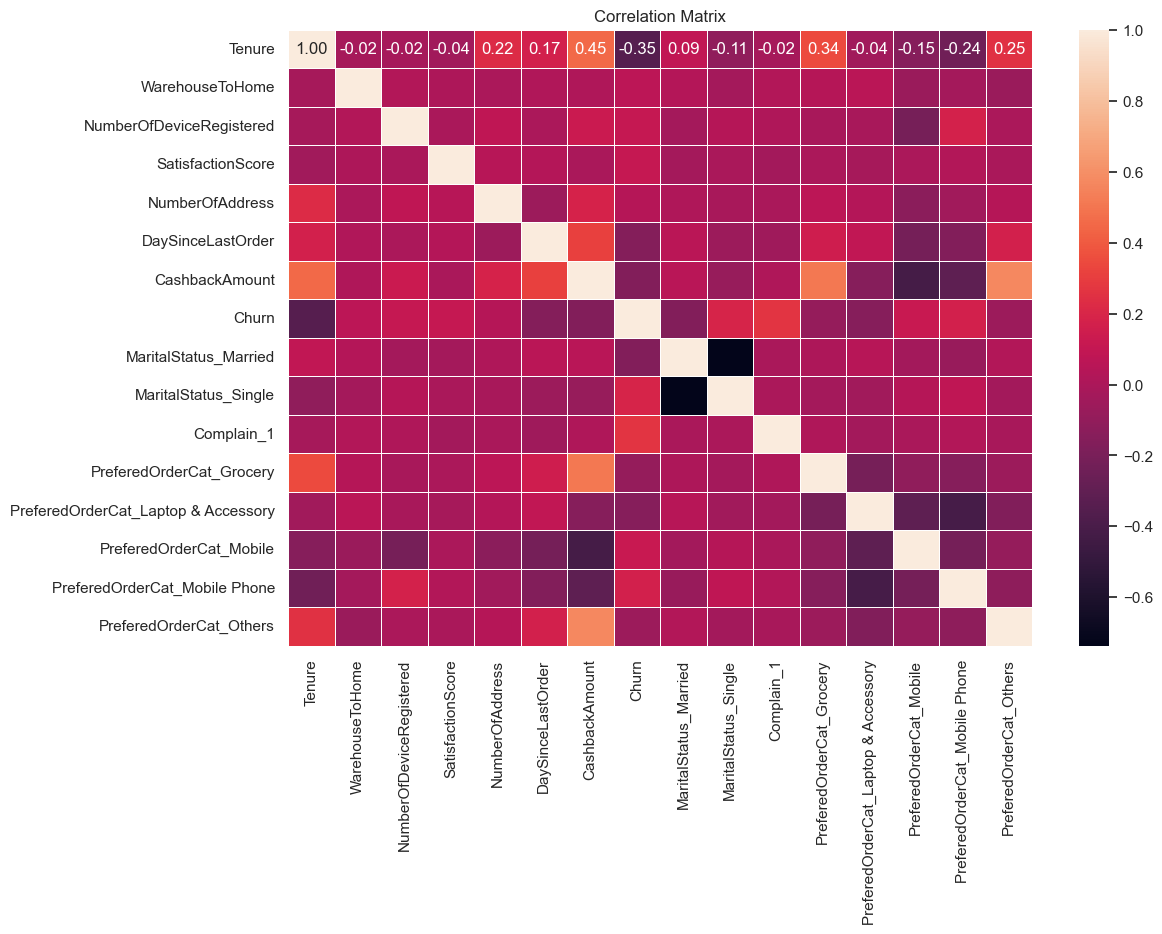

In [41]:
# Menghitung Corelation Matrix
corr_matrix = data_encoded.corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Splitting Data to Training & Testing

In [44]:
from sklearn.model_selection import train_test_split

# Definisikan fitur dan target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Membagi data menjadi data Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (3152, 15)
Testing data shape: (789, 15)


### Koreksi Data Imbalanced dengan SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik untuk menangani masalah data yang tidak seimbang (imbalanced data).

Jika Data Imbalanced tidak ditangani, maka akan terjadi bias pada model yang cenderung memiliki performa yang sangat baik dalam memprediksi kelas mayoritas tetapi sangat buruk dalam memprediksi kelas minoritas. Ini dapat menghasilkan metrik evaluasi yang menyesatkan seperti akurasi yang tinggi tetapi precision dan recall yang rendah untuk kelas minoritas.

Cara Kerja SMOTE:

1) Identifikasi Data Minoritas: SMOTE mengidentifikasi contoh-contoh dari kelas minoritas dalam dataset.
2) Sintesis Sampel Baru: SMOTE membuat sampel baru dari kelas minoritas dengan cara interpolasi. Untuk setiap sampel minoritas, SMOTE memilih beberapa tetangga terdekat dan membuat sampel baru yang terletak di antara sampel asli dan tetangga terdekat tersebut.
3) Tambahkan ke Dataset: Sampel-sampel sintetis ini kemudian ditambahkan ke dataset, sehingga dataset menjadi lebih seimbang.

In [45]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict the test data with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")
print(f"Random Forest - ROC AUC Score: {roc_auc_rf:.2f}")
print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)

Random Forest - Accuracy: 0.93
Random Forest - Precision: 0.86
Random Forest - Recall: 0.71
Random Forest - F1 Score: 0.78
Random Forest - ROC AUC Score: 0.85
Random Forest - Confusion Matrix:
[[645  15]
 [ 37  92]]


Kesimpulan Evaluasi Model:
1. Akurasi model adalah sekitar 93%, yang menunjukkan model memiliki performa keseluruhan yang baik.
2. Presisi menunjukkan bahwa 86% dari pelanggan yang diprediksi sebagai churn memang benar-benar churn.
3. Recall menunjukkan bahwa model dapat mengidentifikasi 71% dari total pelanggan churn.
4. F1 Score adalah rata-rata harmonik dari precision dan recall, memberikan gambaran keseimbangan antara keduanya.

In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       660
           1       0.86      0.71      0.78       129

    accuracy                           0.93       789
   macro avg       0.90      0.85      0.87       789
weighted avg       0.93      0.93      0.93       789



**Akurasi:**

    - Model memiliki akurasi keseluruhan sebesar 0.93, yang berarti 93% dari semua prediksi (baik churn maupun non-churn) adalah benar.

**Kinerja untuk Kelas Non-Churn (0):**

    - Precision: 0.95
	- Menunjukkan bahwa 95% dari pelanggan yang diprediksi tidak akan churn memang benar-benar tidak akan churn.
	- Recall: 0.98
	- Menunjukkan bahwa 98% dari pelanggan yang sebenarnya tidak churn berhasil diidentifikasi dengan benar oleh model.
	- F1-Score: 0.96
	- Kombinasi dari precision dan recall yang tinggi menghasilkan f1-score yang sangat baik, menandakan performa yang sangat baik dalam mengidentifikasi pelanggan yang tidak churn.

**Kinerja untuk Kelas Churn (1):**

	- Precision: 0.86
	- Menunjukkan bahwa 86% dari pelanggan yang diprediksi akan churn memang benar-benar churn.
	- Recall: 0.71
	- Menunjukkan bahwa 71% dari pelanggan yang sebenarnya churn berhasil diidentifikasi oleh model.
	- F1-Score: 0.78
	- Kombinasi dari precision dan recall menghasilkan f1-score yang cukup baik, meskipun tidak setinggi kelas non-churn.
 
**Macro Average:**

    - Precision: 0.90
	- Recall: 0.85
	- F1-Score: 0.87
	- Macro average memberikan gambaran kinerja model pada kedua kelas secara rata-rata, tanpa mempertimbangkan distribusi kelas. Ini menunjukkan bahwa meskipun ada perbedaan dalam kinerja pada masing-masing kelas, model secara keseluruhan masih bekerja dengan baik.

**Kesimpulan Akhir:**

    Model Random Forest yang digunakan memiliki kinerja yang sangat baik dalam mengidentifikasi pelanggan yang tidak churn, dengan precision dan recall yang sangat tinggi untuk kelas ini. Untuk kelas churn, meskipun precision cukup tinggi, recall relatif lebih rendah, menunjukkan bahwa model sedikit kesulitan dalam mengidentifikasi semua pelanggan yang benar-benar churn. Namun, f1-score yang dihasilkan masih cukup baik, menunjukkan keseimbangan yang layak antara precision dan recall untuk kelas churn.

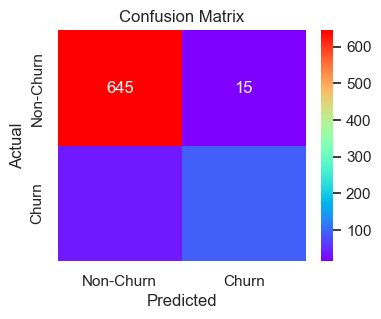

In [62]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='rainbow', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:

|              | Predicted Negative | Predicted Positive |
|--------------|--------------------|--------------------|
| Actual Negative |         645        |         15         |
| Actual Positive |          37        |        93         |

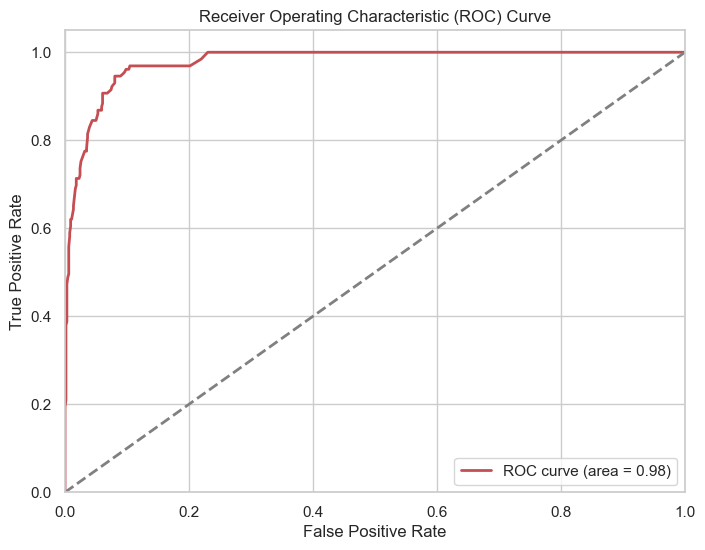

In [66]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Kesimpulan ROC Curve:**

Model Random Forest yang digunakan memiliki performa yang luar biasa dalam membedakan antara pelanggan yang akan churn dan yang tidak, dengan AUC sebesar 0.98. Ini menunjukkan bahwa model sangat efektif dalam prediksi churn, membuatnya sangat dapat diandalkan untuk tujuan bisnis Anda. Dengan mempertimbangkan trade-off antara TPR dan FPR yang ditunjukkan oleh ROC curve, threshold yang tepat dapat dipilih untuk mengoptimalkan tindakan intervensi terhadap pelanggan yang berisiko churn.

### Model Limitation

In [70]:
continuous_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']
feature_ranges = {feature: (data[feature].min(), data[feature].max()) for feature in continuous_features}

categorical_features = ['PreferedOrderCat', 'MaritalStatus', 'Complain']
feature_categories = {feature: data[feature].unique().tolist() for feature in categorical_features}

constraints = {**feature_ranges, **feature_categories}

constraints_df = pd.DataFrame(constraints.items(), columns=['Feature', 'Constraint'])

print("Constraints:")
print(constraints_df)

Constraints:
                    Feature                                         Constraint
0                    Tenure                                        (0.0, 61.0)
1           WarehouseToHome                                       (5.0, 127.0)
2  NumberOfDeviceRegistered                                             (1, 6)
3         SatisfactionScore                                             (1, 5)
4           NumberOfAddress                                            (1, 22)
5         DaySinceLastOrder                                        (0.0, 46.0)
6            CashbackAmount                                      (0.0, 324.99)
7          PreferedOrderCat  [Laptop & Accessory, Mobile, Fashion, Others, ...
8             MaritalStatus                        [Single, Married, Divorced]
9                  Complain                                             [0, 1]


**Model ini hanya valid dalam rentang dataset yang digunakan, yaitu:**

* `Tenure` antara 0.0 dan 61.0 bulan
* `WarehouseToHome` antara 5.0 dan 127.0
* `NumberOfDeviceRegistered` antara 1 dan 6
* `SatisfactionScore` antara 1 dan 5
* `NumberOfAddress` antara 1 dan 22
* `DaySinceLastOrder` antara 0.0 dan 46.0 hari
* `CashbackAmount` antara 0.0 dan 324.99
* `PreferedOrderCat` dengan kategori: 'Laptop & Accessory', 'Mobile', 'Fashion', 'Others', ...
* `MaritalStatus` dengan kategori: 'Single', 'Married', 'Divorced'
* `Complain` dengan nilai 0 atau 1

Apa pun di luar rentang tersebut, apakah lebih kecil atau lebih besar daripada angka, dan kata/status lain untuk kategorikal, tidak valid.

### Model Trustworthiness

**Model pada Capstone 3 ini kurang akurat ('Tidak Dapat Dipercaya'), jika:**
 - Model di test diluar rentang dataset yang sudah di tentukan
 - Metrik Recall pada evaluasi model menunjukan presentase yang rendah
 - Metrik F1 score yang terlalu rendah menunjukan ketidak seimbangan antara recall & precision
 - Efektivitas SMOTE --> Jika data asli memiliki distribusi yang sangat tidak seimbang atau jika data sintetis yang dihasilkan oleh SMOTE tidak cukup bervariasi, model mungkin masih kesulitan untuk memprediksi kelas minoritas dengan baik.
 - Penggunaan Fitur/penambahan fitur yang kurang relevan

**Model pada Capstone 3 ini akurat ('Dapat Dipercaya'), jika:**
 - Akurasi Tinggi --> Jika model menunjukkan akurasi yang tinggi pada data pengujian dan kinerja yang stabil pada k-fold cross-validation
 - F1 Score dan AUC yang Baik: F1 score dan AUC yang tinggi menunjukkan keseimbangan antara precision dan recall, serta kemampuan model untuk memisahkan kelas dengan baik.
 - Jika model mempertahankan kinerja yang baik ketika diuji pada dataset yang baru atau berbeda yang belum pernah dilihat sebelumnya, itu menunjukkan generalizability yang baik.
 - Data yang bersih dan lengkap

### Feature Importance

Feature importance adalah teknik yang digunakan untuk mengidentifikasi dan mengukur pengaruh masing-masing fitur dalam model machine learning. Dalam konteks model Random Forest yang digunakan, feature importance memberikan wawasan tentang seberapa penting setiap fitur dalam membuat prediksi churn.

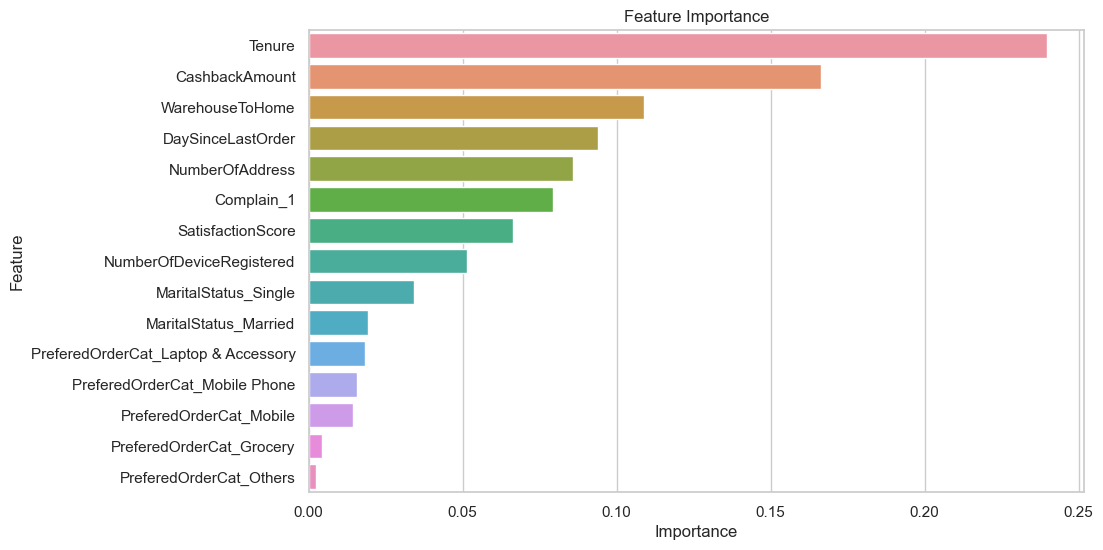

Feature Importance:
                                Feature  Importance
0                                Tenure    0.239662
6                        CashbackAmount    0.166184
1                       WarehouseToHome    0.108825
5                     DaySinceLastOrder    0.094030
4                       NumberOfAddress    0.085938
9                            Complain_1    0.079153
3                     SatisfactionScore    0.066412
2              NumberOfDeviceRegistered    0.051471
8                  MaritalStatus_Single    0.034088
7                 MaritalStatus_Married    0.019297
11  PreferedOrderCat_Laptop & Accessory    0.018132
13        PreferedOrderCat_Mobile Phone    0.015810
12              PreferedOrderCat_Mobile    0.014463
10             PreferedOrderCat_Grocery    0.004205
14              PreferedOrderCat_Others    0.002329


In [80]:
# Menghasilkan feature importance
feature_importances = RF_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

print("Feature Importance:")
print(importance_df)

### Recomendation For Business
Berdasarkan hasil dari Feature Importance diatas, kita dapat melihat Fitur penting apa saja yang berkontribusi kepada Churn dari pelanggan.
Berikut rekomendasi yang dapat di implementasikan pada bisnis:

**1. Tindakan Proaktif:**
- **Tenure**: Fokus pada pelanggan baru untuk meningkatkan retensi dengan menawarkan program orientasi atau insentif awal.
- **Cashback**: Evaluasi kembali program cashback untuk memastikan cukup menarik bagi pelanggan.

**2. Peningkatan Layanan:**
- **WarehouseToHome**: Pertimbangkan peningkatan layanan pengiriman atau membuka lebih banyak gudang untuk mengurangi waktu pengiriman.
- **Complain**: Pastikan keluhan pelanggan ditangani dengan cepat dan efektif untuk meningkatkan kepuasan dan mengurangi churn.

**3. Pemantauan dan Intervensi:**
- **DaySinceLastOrder**: Identifikasi pelanggan yang sudah lama tidak melakukan pesanan dan kirimkan penawaran khusus atau pengingat.
- **SatisfactionScore**: Terus pantau kepuasan pelanggan dan lakukan survei rutin untuk mengidentifikasi area yang perlu diperbaiki.

**4. Analisis Tambahan:**
- **PreferedOrderCat**: Lakukan analisis lebih lanjut untuk melihat apakah ada pola tertentu dalam preferensi kategori pesanan yang dapat memberikan wawasan tambahan tentang perilaku churn.

### Recommendation For Improving Model

 1. Penambahan Fitur yang lebih representatif terhadap perilaku pelanggan, seperti rata-rata pesanan bulanan, jumlah keluahn per bulan, dll
 2. Bisa dilakukan penambahan fitur temporal seperti tren waktu/perubahan perilaku pelanggan dari waktu ke waktu
 3. Melakukan Handling missing value menggunakan KNN imputation
 4. Penggunaan teknik ensemble seperti Bagging dan Boosting, yang dimana bisa menangani imbalance class dengan lebih baik
 5. Jika SMOTE tetap menjadi pilihan yang digunakan, pertimbangkan untuk memberikan bobot lebih pada kelas minoritas dalam algoritma ML nya
 6. Lakukan Hyperparameter Tuning dengan menggunakan Bayesian Optimization supaya kinerja model bisa lebih baik
 7. Penggunaan Model lain selain Random Forest dapat dicoba seperti XGBoost, GBM, LightGBM atau gunakan teknik esemble methods